# The archive

When you fit a brush estimator, two new attributes are created: `best_estimator_` and `archive_`.

If you set `use_arch` to `True` when instantiating the estimator, then it will store the pareto front as a list in `archive_`. This pareto front is always created with individuals from the final population that are not dominated in objectives **error** and **complexity**.

In case you need more flexibility, the archive will contain the entire final population if `use_arch` is `False`, and you can iterate through this list to select individuals with different criteria. It is also good to remind that Brush supports different optimization objectives using the argument `objectives`.

Each element from the archive is a serialized individual (JSON object).

In [1]:
import pandas as pd
from pybrush import BrushClassifier

# load data
df = pd.read_csv('../examples/datasets/d_analcatdata_aids.csv')
X = df.drop(columns='target')
y = df['target']

In [2]:
est = BrushClassifier(
    functions=['SplitBest','Add','Mul','Sin','Cos','Exp','Logabs'],
    use_arch=True,
    objectives=["error", "linear_complexity"],
    max_gens=100,
    pop_size=200,
    verbosity=1
)

est.fit(X,y)

print("Best model:", est.best_estimator_.get_model())
print('score:', est.score(X,y))

Completed 100% [====================]
Best model: 1043.19*Logistic(Sum(-4.5942945,0.16*Logabs(0.00*AIDS)))
score: 0.58


You can see individuals from archive using the index:

In [3]:
print(len(est.archive_[0]))

est.archive_[0]

6


{'fitness': {'complexity': 17688,
  'crowding_dist': 3.4028234663852886e+38,
  'dcounter': 0,
  'depth': 4,
  'dominated': [],
  'linear_complexity': 35,
  'loss': 0.6193585991859436,
  'loss_v': 0.6193585991859436,
  'rank': 1,
  'size': 12,
  'values': [0.6193585991859436, 35.0],
  'weights': [-1.0, -1.0],
  'wvalues': [-0.6193585991859436, -35.0]},
 'id': 0,
 'objectives': ['log', 'linear_complexity'],
 'parent_id': [],
 'program': {'Tree': [{'W': 1043.1932373046875,
    'arg_types': ['ArrayF'],
    'center_op': True,
    'feature': '',
    'fixed': True,
    'is_weighted': True,
    'name': 'Logistic',
    'node_type': 'Logistic',
    'prob_change': 0.0,
    'ret_type': 'ArrayF',
    'sig_dual_hash': 10617925524997611780,
    'sig_hash': 13326223354425868050},
   {'W': -4.594294548034668,
    'arg_types': ['ArrayF'],
    'center_op': True,
    'feature': '',
    'fixed': True,
    'is_weighted': True,
    'name': 'OffsetSum',
    'node_type': 'OffsetSum',
    'prob_change': 0.0,
  

And you can call `predict` (or `predict_proba`, if your `est` is an instance of `BrushClassifier`) with the entire archive:

In [4]:
est.predict_archive(X)


[{'id': 0,
  'y_pred': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True, False,  True,  True,  True,  True, False, False, False,
         False, False, False, False, False, False, False, False,  True,
          True,  True, False, False,  True,  True,  True,  True, False,
          True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False])},
 {'id': 546,
  'y_pred': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True, False,  True,  True,  True,  True,
         False,  True,  True,  True, False])},
 {'id': 459,
  'y_pred': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  Tr

In [5]:
est.predict_proba_archive(X)

[{'id': 0,
  'y_pred': array([0.52221817, 0.8515583 , 0.9071904 , 0.80226165, 0.6996155 ,
         0.520049  , 0.78892744, 0.842689  , 0.7451944 , 0.6505222 ,
         0.47254738, 0.72843987, 0.76070005, 0.6610676 , 0.57487196,
         0.26737478, 0.42796203, 0.46070603, 0.4102002 , 0.3626234 ,
         0.25170955, 0.3872591 , 0.39140493, 0.32901868, 0.27749935,
         0.40157905, 0.5770795 , 0.5878265 , 0.5081532 , 0.49348217,
         0.47929123, 0.67033243, 0.69713384, 0.5947533 , 0.52153325,
         0.40196913, 0.5745975 , 0.5838619 , 0.5000032 , 0.44313556,
         0.19933364, 0.3027608 , 0.31477427, 0.29399228, 0.28357497,
         0.17851885, 0.2997828 , 0.29916808, 0.258853  , 0.2281006 ],
        dtype=float32)},
 {'id': 546,
  'y_pred': array([5.3191483e-01, 5.3191483e-01, 5.3191483e-01, 5.3191483e-01,
         5.3191483e-01, 5.3191483e-01, 5.3191483e-01, 5.3191483e-01,
         5.3191483e-01, 5.3191483e-01, 5.3191483e-01, 5.3191483e-01,
         5.3191483e-01, 5.3191483

## Visualizing the Pareto front of the archive

4


Text(0, 0.5, 'Complexity (smaller is better)')

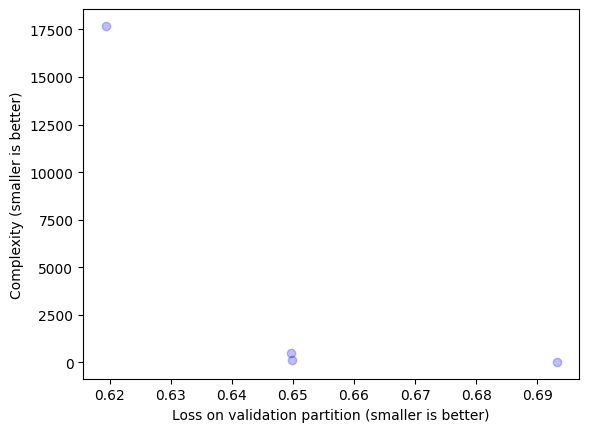

In [6]:
import matplotlib.pyplot as plt

xs, ys = [], []
for ind in est.archive_:
    xs.append(ind['fitness']['loss_v'])
    ys.append(ind['fitness']['complexity'])

print(len(xs))
plt.scatter(xs, ys, alpha=0.25, c='b', linewidth=1.0)
plt.xlabel("Loss on validation partition (smaller is better)")
plt.ylabel("Complexity (smaller is better)")